**Tarea de Clasificación**

Astrid Natalia Castilla Reyes

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping



**Importamos la información**

In [5]:
df_c = pd.read_csv("/content/drive/MyDrive/Tareas_de_topicos_datasets/data.csv").drop("Unnamed: 32", axis=1)


In [6]:
df_c.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Preprocesamiento**

In [15]:
x = df_c.iloc[:,2:].values # extrae como tensores numpy
y = df_c.iloc[:,1].values

#Adicionalmente, debemos codificar la variable objetivo

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
sc = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
x_train.shape[1]

30

**Modelo**

In [56]:
model2 = Sequential()

# input layer
model2.add(Dense(units= 30, input_shape=(30,),activation='relu'))
model2.add(Dropout(0.3))

# hidden layer
model2.add(Dense(15,activation='relu'))
model2.add(Dropout(0.4))

# hidden layer
model2.add(Dense(10,activation='relu'))


# output layer
model2.add(Dense(1, activation='sigmoid'))

# compile model
model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=[AUC(name='AUC')])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [57]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_22 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_23 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 11        
Total params: 1,566
Trainable params: 1,566
Non-trainable params: 0
___________________________________________________

In [58]:

history = model2.fit(x=x_train, 
          y=y_train, 
          epochs=150,
          verbose = 2,
          validation_data=(x_test, y_test),
          callbacks=[early_stop])



Epoch 1/150
15/15 - 1s - loss: 0.7131 - AUC: 0.6130 - val_loss: 0.6455 - val_AUC: 0.9527
Epoch 2/150
15/15 - 0s - loss: 0.6738 - AUC: 0.6927 - val_loss: 0.5736 - val_AUC: 0.9848
Epoch 3/150
15/15 - 0s - loss: 0.5648 - AUC: 0.8623 - val_loss: 0.4843 - val_AUC: 0.9859
Epoch 4/150
15/15 - 0s - loss: 0.4465 - AUC: 0.9402 - val_loss: 0.3749 - val_AUC: 0.9868
Epoch 5/150
15/15 - 0s - loss: 0.3847 - AUC: 0.9384 - val_loss: 0.2808 - val_AUC: 0.9883
Epoch 6/150
15/15 - 0s - loss: 0.3119 - AUC: 0.9690 - val_loss: 0.2193 - val_AUC: 0.9883
Epoch 7/150
15/15 - 0s - loss: 0.2591 - AUC: 0.9699 - val_loss: 0.1809 - val_AUC: 0.9892
Epoch 8/150
15/15 - 0s - loss: 0.2352 - AUC: 0.9738 - val_loss: 0.1532 - val_AUC: 0.9905
Epoch 9/150
15/15 - 0s - loss: 0.1886 - AUC: 0.9833 - val_loss: 0.1305 - val_AUC: 0.9929
Epoch 10/150
15/15 - 0s - loss: 0.1721 - AUC: 0.9852 - val_loss: 0.1142 - val_AUC: 0.9943
Epoch 11/150
15/15 - 0s - loss: 0.1534 - AUC: 0.9854 - val_loss: 0.1045 - val_AUC: 0.9948
Epoch 12/150
15/15 

In [59]:
y_pred = model2.predict(x_test)
cr = classification_report(y_test, (y_pred> 0.5))
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



*Función de pérdida*

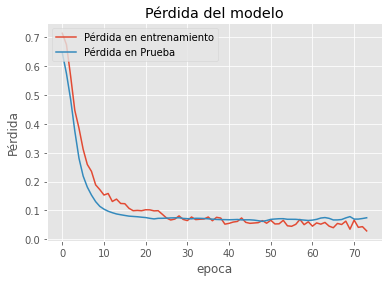

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('epoca')
plt.legend(['Pérdida en entrenamiento', 'Pérdida en Prueba'], loc='upper left')
plt.show()

**Resultado para la métrica empleada**

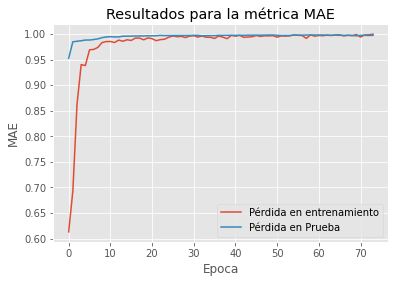

In [63]:
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Resultados para la métrica AUC')
plt.ylabel('AUC')
plt.xlabel('Epoca')
plt.legend(['Pérdida en entrenamiento', 'Pérdida en Prueba'], loc='lower right')
plt.show()